# Program for HW9

HW - 9

Name: Arush Kumar Singh

Roll No: 190182


In [90]:
#importing libraries 
import numpy as np
import math
import sys
import sympy as sym
from sympy import symbols, exp
import matplotlib.pyplot as plt 

%matplotlib inline

#setting precision upto10 digits
np.set_printoptions(precision=10)
np.set_printoptions(suppress=True)

In [91]:
#input parameters
m = 50
dx = 0.01
x0 = 0
x1 = 1



In [92]:
#calculating other parameters 
b = -2 - m*m*dx*dx
b

-2.25

In [93]:
# creating an array to store discrete values of x with step size dx
n = int((x1-x0)/dx) + 1
arrx = np.zeros(n)
print(arrx.shape)
dx1 = 0 
for i in range(n):
    arrx[i] = dx1
    dx1 += dx
arrx

(101,)


array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [94]:
#creating thomas matrix for the sparse matrix of equations 
thomas = np.zeros((n,3))
thomas1 = np.zeros((n,1))
theta  = np.zeros(n)
analytical = np.zeros(n)
thomas1[0] = 1
for i in range(n-2):
    thomas[i+1][0] = 1
    thomas[i+1][1] = b
    thomas[i+1][2] = 1
    thomas[0][0] = 1
    thomas[100][0] = 1
    thomas[100][1] = -4
    thomas[100][2] = 3
thomas

array([[ 1.  ,  0.  ,  0.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1.  , -2.25,  1.  ],
       [ 1

In [95]:
# a  = 0  b = 1 c = 2

thomas[1][0]  =  thomas[1][0] - thomas[0][0]
thomas1[1][0] =  thomas1[1][0] - thomas1[0][0]

for i in range(1,n-2):
    r = thomas[i+1][0]/thomas[i][1]
    print(r)
    thomas[i+1][0] = thomas[i+1][0] - thomas[i][1]*r
    thomas[i+1][1] = thomas[i+1][1] - thomas[i][2]*r
    thomas1[i+1][0] = thomas1[i+1][0] - thomas1[i][0]*r
    


r = thomas[n-1][0]/thomas[n-3][1]


thomas[n-1][0] = thomas[n-1][0] - thomas[n-3][1]*(r)
thomas[n-1][1] = thomas[n-1][1] - thomas[n-3][2]*(r)

r = thomas[n-1][1]/thomas[n-2][1]
thomas[n-1][1] = thomas[n-1][1] - thomas[n-2][1]*r
thomas[n-1][2] = thomas[n-1][2] - thomas[n-2][2]*r



thomas

-0.4444444444444444
-0.5538461538461539
-0.5895691609977325
-0.602253328781154
-0.6068894068894068
-0.6086017607049125
-0.6092366715523337
-0.6094724221720049
-0.6095600058878421
-0.6095925505286294
-0.6096046444572384
-0.6096091388097886
-0.6096108090205004
-0.6096114297137534
-0.6096116603796506
-0.6096117461011943
-0.6096117779575915
-0.6096117897962737
-0.6096117941958423
-0.6096117958308387
-0.6096117964384468
-0.6096117966642501
-0.6096117967481646
-0.6096117967793494
-0.6096117967909385
-0.6096117967952454
-0.609611796796846
-0.6096117967974407
-0.6096117967976616
-0.6096117967977439
-0.6096117967977744
-0.6096117967977858
-0.6096117967977899
-0.6096117967977914
-0.6096117967977921
-0.6096117967977923
-0.6096117967977924
-0.6096117967977924
-0.6096117967977924
-0.6096117967977924
-0.6096117967977924
-0.6096117967977924
-0.6096117967977924
-0.6096117967977924
-0.6096117967977924
-0.6096117967977924
-0.6096117967977924
-0.6096117967977924
-0.6096117967977924
-0.6096117967977924
-0

array([[ 1.          ,  0.          ,  0.          ],
       [ 0.          , -2.25        ,  1.          ],
       [ 0.          , -1.8055555556,  1.          ],
       [ 0.          , -1.6961538462,  1.          ],
       [ 0.          , -1.660430839 ,  1.          ],
       [ 0.          , -1.6477466712,  1.          ],
       [ 0.          , -1.6431105931,  1.          ],
       [ 0.          , -1.6413982393,  1.          ],
       [ 0.          , -1.6407633284,  1.          ],
       [ 0.          , -1.6405275778,  1.          ],
       [ 0.          , -1.6404399941,  1.          ],
       [ 0.          , -1.6404074495,  1.          ],
       [ 0.          , -1.6403953555,  1.          ],
       [ 0.          , -1.6403908612,  1.          ],
       [ 0.          , -1.640389191 ,  1.          ],
       [ 0.          , -1.6403885703,  1.          ],
       [ 0.          , -1.6403883396,  1.          ],
       [ 0.          , -1.6403882539,  1.          ],
       [ 0.          , -1.64

In [96]:
#back substitution
theta[n-i-1] = thomas1[n-i-1]/thomas[n-i-1][2]
for i in range(n-1):
    theta[n-i-2] = (thomas1[n-i-2] - thomas[n-i-2][2]*theta[n-i-1])*thomas[n-i-2][1]
theta[0] = 200
theta = theta/200
theta

array([1.          , 0.8163035368, 0.3578015719, 0.1959448022,
       0.1142922434, 0.0681072605, 0.0408965657, 0.0246245056,
       0.0148407408, 0.0089466847, 0.0053936071, 0.0032513693,
       0.0019597794, 0.0011811232, 0.0007117493, 0.0004288453,
       0.0002583534, 0.0001556204, 0.000093725 , 0.0000564391,
       0.0000339812, 0.0000204564, 0.0000123126, 0.0000074097,
       0.0000044584, 0.0000026821, 0.0000016132, 0.0000009702,
       0.0000005833, 0.0000003507, 0.0000002108, 0.0000001266,
       0.0000000761, 0.0000000457, 0.0000000274, 0.0000000165,
       0.0000000099, 0.0000000059, 0.0000000036, 0.0000000021,
       0.0000000013, 0.0000000008, 0.0000000005, 0.0000000003,
       0.0000000002, 0.0000000001, 0.0000000001, 0.          ,
       0.          , 0.          , 0.          , 0.          ,
       0.          , 0.          , 0.          , 0.          ,
       0.          , 0.          , 0.          , 0.          ,
       0.          , 0.          , 0.          , 0.    

In [97]:
#analytical solution
for i in range(n):
    analytical[i] = (math.cosh(m*(arrx[i]-1)))/math.cosh(m)
analytical

array([1.          , 0.6065306597, 0.3678794412, 0.2231301601,
       0.1353352832, 0.0820849986, 0.0497870684, 0.0301973834,
       0.0183156389, 0.0111089965, 0.006737947 , 0.0040867714,
       0.0024787522, 0.0015034392, 0.000911882 , 0.0005530844,
       0.0003354626, 0.0002034684, 0.0001234098, 0.0000748518,
       0.0000453999, 0.0000275364, 0.0000167017, 0.0000101301,
       0.0000061442, 0.0000037267, 0.0000022603, 0.000001371 ,
       0.0000008315, 0.0000005043, 0.0000003059, 0.0000001855,
       0.0000001125, 0.0000000683, 0.0000000414, 0.0000000251,
       0.0000000152, 0.0000000092, 0.0000000056, 0.0000000034,
       0.0000000021, 0.0000000013, 0.0000000008, 0.0000000005,
       0.0000000003, 0.0000000002, 0.0000000001, 0.0000000001,
       0.          , 0.          , 0.          , 0.          ,
       0.          , 0.          , 0.          , 0.          ,
       0.          , 0.          , 0.          , 0.          ,
       0.          , 0.          , 0.          , 0.    

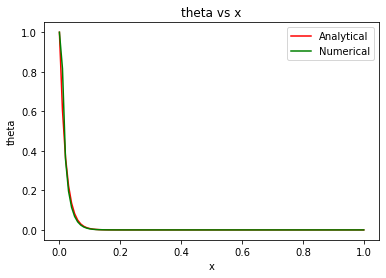

In [98]:
#plotting with matplotlib library on the same graph
plt.plot(arrx,analytical,color='r', label='Analytical')
plt.plot(arrx,theta,color='g', label='Numerical')


plt.xlabel("x")
plt.ylabel("theta")
plt.title("theta vs x")
plt.legend()
plt.show()

In [99]:
theta

array([1.          , 0.8163035368, 0.3578015719, 0.1959448022,
       0.1142922434, 0.0681072605, 0.0408965657, 0.0246245056,
       0.0148407408, 0.0089466847, 0.0053936071, 0.0032513693,
       0.0019597794, 0.0011811232, 0.0007117493, 0.0004288453,
       0.0002583534, 0.0001556204, 0.000093725 , 0.0000564391,
       0.0000339812, 0.0000204564, 0.0000123126, 0.0000074097,
       0.0000044584, 0.0000026821, 0.0000016132, 0.0000009702,
       0.0000005833, 0.0000003507, 0.0000002108, 0.0000001266,
       0.0000000761, 0.0000000457, 0.0000000274, 0.0000000165,
       0.0000000099, 0.0000000059, 0.0000000036, 0.0000000021,
       0.0000000013, 0.0000000008, 0.0000000005, 0.0000000003,
       0.0000000002, 0.0000000001, 0.0000000001, 0.          ,
       0.          , 0.          , 0.          , 0.          ,
       0.          , 0.          , 0.          , 0.          ,
       0.          , 0.          , 0.          , 0.          ,
       0.          , 0.          , 0.          , 0.    

# END